In [1]:
import csv

# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 100% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Neuronale Netze - Adaline

*Gruppenmitglieder: Dejan Sovic, Lucas Wessel, Timo Schmitt, Simon Gärtner*


## Aufgabenstellung

### Kleines Projekt 02: Neuronale Netzte - Adaline

In diesem Projekt betrachten wir das Adaline (ADAptive LInear NEuron), ein künstliches Neuron. Das Adaline besitzt die Parameter $w_0, w_1,... w_n \in \mathbb R$ und stellt eine mathematische Funktion 

 <p style="text-align: center;">$g: \mathbb R^n \rightarrow \{-1,1\}, g(x)=\alpha(f(x))$</p>

mit

 <p style="text-align: center;">$f: \mathbb R^n \rightarrow \mathbb R, f(x) = w_0 \times 1 + \sum_{j=1}^n{w_j\times x_j}$</p>

und

 <p style="text-align: center;">$\alpha: \mathbb R \rightarrow \{-1,1\}, \alpha (x) = \begin{cases} -1 \quad falls, x \leq 0 \\ 1, \quad falls, x > 0 \end{cases}$</p>

dar. Eine schematische Darstellung eines Adaline kann der folgenden Abbildung entnommen werden. 

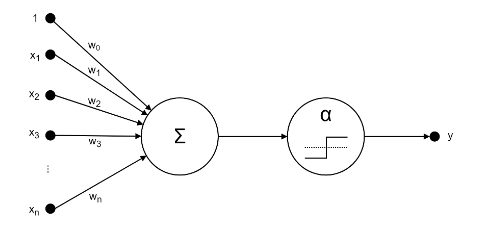

Das Adaline kann für die Klassifikation verwendet werden, d.h. es ordnet einen Datenpunkt $x \in \mathbb R^n$ eine der beiden Klassen positiv 1 und negativ -1 zu. Durch Anpassungen der Parameter $w_i$ an einen gegebenen Datensatz mit k Datenpunkten

 <p style="text-align: center;">$D=\{(x^{(i)}, y^{(i)}) \mid 1 \leq i \leq k\}\subseteq \mathbb R \times \{-1,1\}$</p>
 
 dem Training, kann das Adaline eine solche Klassifikationsaufgabe lernen. Die folgende Abbildung zeigt exemplarisch eine Klassifikation von Datenpunkte $x^{(i)} \in \mathbb R^2$ nach positiv 1 (blau) und negativ -1 (rot).
 
 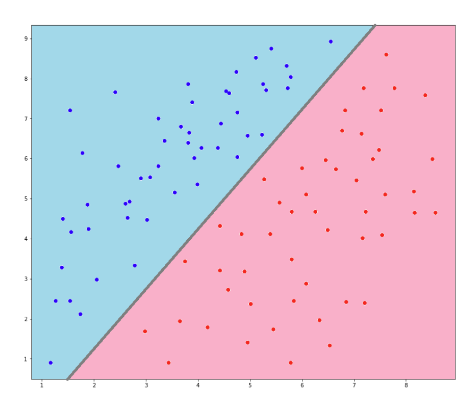
 
 Für das Traning wählt man eine Fehlerfunktion, wie z.B. den quadrierten Fehler $E^{(i)}$ für den Datenpunkt, $(x^{(i)}, y^{(i)})$ gegeben durch 
 
 <p style="text-align: center;">$E^{(i)}=\frac 12 (y^{(i)} - f(x^{(i)}))^2$</p>
 
 und passt iterativ über alle Datenpunkte $(x^{(i)}, y^{(i)})$ für $i \in \{1,...,k\}$ des Datensatzes (innere Schleife im Code) und mehrere Durchgänge hinweg (äußere Schleife im Code) ausgehend von einer (oft zufälligen) initialen Wahl, die Parameter $w_0, w_1, ..., w_n$ mit der Regel 
 
 <p style="text-align: center;">$w_j \leftarrow w_j - \eta \times \frac {d}{dw_j}E^{(i)}$</p>
 
an (innere Schleife im Code).

1. Bestimmen Sie die allgemeine Ableitung des quadratischen Fehlers bzgl. des i-ten Datenpunkts nach allen Parametern $w_j$ für $j \in \{0,...,n\}$. Es genügt, wenn sie die Fällle $j=0$ und $j>0$ explizit betrachten.
2. Implementieren Sie den Traningsalgorithmus des Adalines.
3. Implementieren Sie einen Algorithmus, der bestimmt wie viel Prozent der Daten korrekt klassifiziert wurden. Achtung: Zum Lernen wird Funktion f angepasst, jedoch wird die tatsächliche Anwendung die volle Funktion g verwendet!
4. Plotten Sie den Datensatz `adaline.csv`. Was fällt Ihnen auf?
5. Testen und Evaluieren Sie das Adaline bzgl. des Datensatzes `adaline.csv`.
6. Konstruieren und plotten Sie einen Datensatz, bei dem Ihnen als Mensch eine Klassifikation der Datenpunkte leicht fällt, wo das Adaline jedoch versagt. Warum versagt die Methode in diesem Fall? Beschreiben Sie einen möglichen Ansatz zur Lösung des Problems (z.B. Transformation der Daten, Anpassungen der Methode...).
7. *Bonusaufgabe*: Suchen Sie sich einen frei verfügbaren Datensatz mit einem Klassifikationsproblem und wenden Sie Ihre Implementierung des Adaline darauf an.


# Dokumentation und SageMath Skript

*Wir haben uns dazu entschlossen, die Dokumentation in das SageMath Skript einzubinden. Daher finden Sie hier eine ausführliche Erklärung des Problems, des Skriptes, der Ergebnisse und der Arbeitsaufteilung.*

## Problembeschreibung

*Problembeschreibung folgt*

## Mathematisches Modell

*Mathematisches Modell folgt*

## Implementierung in SageMath & Analyse und Deutung der Ergebnisse

**Aufgabe 1**

In folgender Methode findet man die Ableitungen der Fehlerfunktion. Je nachdem welcher Index übergeben wird, wird die entsprechende Funktion ausgewählt. 

- Index = 0: Ableitung nach w0
- Index = 1: Ableitung nach w1
- Index = 2: Ableitung nach w2

Der Rückgabewert ist dann das Ergebnis, wenn man die Daten des Punktes und der aktuellen Geraden einsetzt.

In [2]:
def E(index, values):
        
    if index == 0:
        diff = -values['y'] + w0 + w1 * values['x1'] + w2 * values['x2']
    elif index == 1:
        diff = values['x1'] * (-values['y'] + w0 + w1 * values['x1'] + w2 * values['x2'])
    elif index == 2:
        diff = values['x2'] * (-values['y'] + w0 + w1 * values['x1'] + w2 * values['x2'])
    
    return diff(w0 = wList[0], w1 = wList[1], w2 = wList[2])

**Aufgabe 2**

Hier werden alle Parameter definiert und mit Startwerten initialisiert. Die Werte `w0, w1, w2` werden benötigt um die Funktion darzustellen die die Kategorieren von einander trennt. Für eine bessere Bearbeitung werden diese dann der Reihe nach in eine Liste gepackt `wList` und mit Startwerten initialisiert. Die Liste `dict_values` wird dazu benötigt, um alle Punkte und deren Klassifikation aus der csv Datei zu speichern. Das eta definiert unsere Schrittweite um die sich die Funktion in jeder Iteration verbessert (oder verschlechtert). `gamma` definiert die Veränderung bei der der Lernalgorithmus abbricht.

In [3]:
# define variables
w0, w1, w2 = var('w0, w1, w2')

# add w parameters to one list -> better for iteration
# start values = 1
wList = [1, 1, 1]

# dictonary to storage all points from csv file
dict_values = []

# define value for eta
eta = 0.01

# define gamma 
gamma = 0.4

Die Methode `f(x)` summiert und multipliziert die Werte des Punktes und der Geraden nach der oben definerten Vorgehensweise. Hiermit kann dann eine Klassfikation mit Hilfe der erlernten Geraden durchgeführt werden.

In [4]:
def f(value):
    
    result = wList[0] + wList[1] * value['x1'] + wList[2] * value['x2']
    
    return result

Die Methode `alpha(x)` kategorisiert nach den oben beschriebenen Kriterien einen Wert in -1 oder 1 ein.

In [5]:
def alpha(x):
    result = -1
    
    if x > 0:
        result = 1
        
    return result

Die Methode `g(x)` fasst die Funktionen `f(x)` und `alpha(x)` zusammen und führt diese nacheinander aus.

In [6]:
def g(x):
    return alpha(f(x))

Die Methode `createFunktion(w0, w1, w2)` erstellt aus den übergebenen Parametern eine Gerade und gibt diese als Funktion zurück.

In [7]:
def createFunction(w0, w1, w2):
    function = (w0 + w1 * x) / -w2
    return function

Die Methode `plotAll()` sorgt dafür, dass ein komplettes Koordinatensystem mit allen Punkten und der Ausgleichsgeraden geplottet wird. Die Punkte werden ebenfalls nach ihrer Kategorie bunt gefärbt (-1 = rot, 1 = blau).

In [8]:
def plotAll():

    g = Graphics()

    g += plot(createFunction(wList[0], wList[1], wList[2]), (x, 0, 9), ymin = 0, ymax = 9, fill='min', fillalpha=0.1, fillcolor='red', color='grey', thickness=2)
    g += plot(createFunction(wList[0], wList[1], wList[2]), (x, 0, 9), ymin = 0, ymax = 9, fill='max', fillalpha=0.1, fillcolor='blue', color='grey', thickness=2)

    for value in dict_values:
        if value['y'] < 0:
            pointsColor = 'red'
        else:
            pointsColor = 'blue'
            
        g += point((value['x1'], value['x2']), color = pointsColor)
        
    g.show()

Die Methode `readData()` liest alle Daten der vorgegebenen csv Datei ein uns speichert diese als Dictonary in der Liste `dict_values` ab. Nachdem alle Daten eingelesen worden sind, gibt die Methode die Liste mit allen Punkte zurück.

In [9]:
def readData():
    with open('adaline.csv', 'r', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        for row in reader:
            values = row[0].split(",")
            dict_values.append({
                'y': float(values[0]),
                'x1': float(values[1]),
                'x2': float(values[2])
            })
    
    return dict_values

Die Methode `recalculate(values)` nimmt für alle w's eine Neuberechung vor. Hierfür wird die Fehlerfunktion ausgewertet und anschließend mit dem alten `w` und dem oben definerten `eta` verrechnet.

In [10]:
def recalculate(values):
    for index in range(3):
        wList[index] -= eta * E(index, values)

Die Methode `terminate_condition (dict_values)` stellt die Abbruchbedingung für den Lernalgorithmus da. Wenn diese False zurückgibt, dann ist der Lernalgorithums abgeschlossen, weil die Veränderung kleiner als die in `gamma` definierte ist. Liefert sie True, dann ist die Veränderung noch größer und der Algorithmus läuft weiter.

In [11]:
def terminate_condition (dict_values):
    
    result = 0;
    
    for value in dict_values:
        result += abs(value['y'] - alpha(f(value)))
    
    result *= 1 / len(dict_values)
    
    if result > gamma:
        value = True
    else: 
        value = False
    
    return value 

**Aufgabe 3**

*Hier folgt noch Code der eine Analyse macht: Wie viel Prozent der Daten sind korrekt klassifiziert?*

 **Aufgabe 4**
 
 Folgender Programmabschnitt für das Verfahren für die vorgebenene `adaline.csv` Daten einmal durch und plotten in regelmäßigen Abständen einmal den aktuellen Stand. Hierbei werden immer alle Punkte und die aktuelle Ausgleichsgerade dargestellt.

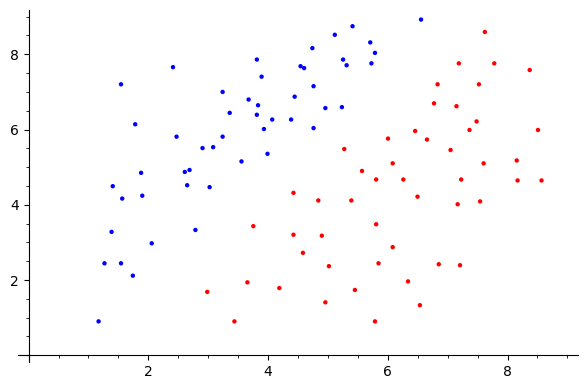

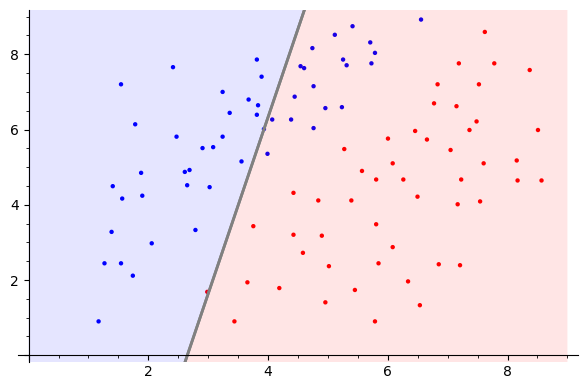

In [12]:
dict_values = readData()

plotAll()

while terminate_condition(dict_values):
    for values in dict_values:
        recalculate(values)
        
plotAll()

## Deutung und Analyse der Ergebnisse des Adalines bzgl. des Datensatzes `adaline.csv`

**Aufgabe 5**

*Deutung folgt*

**Aufgabe 6**

*Inhalt folgt*

## Fazit

*Fazit folgt*

## Arbeitsteilung

*Arbeitsteilung folgt*